In [113]:
import pandas as pd
df = pd.read_csv('myntra_products_catalog.csv')
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


In [114]:
df = df.drop(columns=['ProductID', 'ProductName', 'Price (INR)', 'NumImages', 'PrimaryColor', 'ProductBrand'])
df.head()

,Gender,Description
0,Unisex,"Black and grey printed medium trolley bag, sec..."
1,Women,Beige & Grey made to measure kurta with churid...
2,Women,Pink coloured wash 5-pocket high-rise cropped ...
3,Men,Blue self-design bandhgala suitBlue self-desig...
4,Men,"Brown and off-white printed casual shirt, has ..."


In [115]:
df.isnull().sum()

Gender         0
Description    0
dtype: int64

In [116]:
import numpy as np
a = df.Gender.value_counts()
a

Women          5126
Men            4591
Unisex         1188
Boys           1100
Girls           440
Unisex Kids      46
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

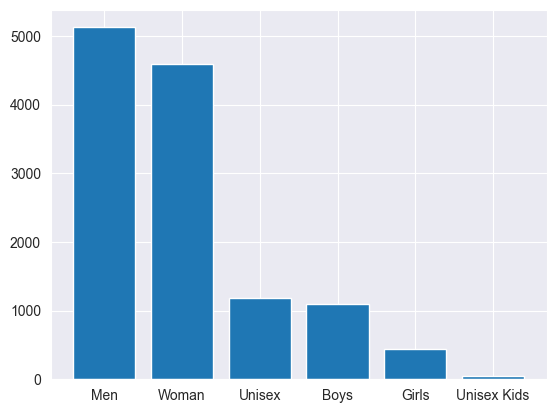

In [117]:
import matplotlib.pylab as plt

Y = a.values
X = ['Men', 'Woman', 'Unisex', 'Boys', 'Girls', 'Unisex Kids']

plt.bar(X, Y)
plt.show


In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Gender       12491 non-null  object
 1   Description  12491 non-null  object
dtypes: object(2)
memory usage: 195.3+ KB


In [119]:
kategory = pd.get_dummies(df.Gender)
df_baru = pd.concat([df, kategory], axis=1)
df_baru


,Gender,Description,Boys,Girls,Men,Unisex,Unisex Kids,Women
0,Unisex,"Black and grey printed medium trolley bag, sec...",0,0,0,1,0,0
1,Women,Beige & Grey made to measure kurta with churid...,0,0,0,0,0,1
2,Women,Pink coloured wash 5-pocket high-rise cropped ...,0,0,0,0,0,1
3,Men,Blue self-design bandhgala suitBlue self-desig...,0,0,1,0,0,0
4,Men,"Brown and off-white printed casual shirt, has ...",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
12486,Men,"Black dark wash 5-pocket low-rise jeans, clean...",0,0,1,0,0,0
12487,Women,"A pair of gold-toned open toe heels, has regul...",0,0,0,0,0,1
12488,Girls,Navy Blue and White printed mid-rise denim sho...,0,1,0,0,0,0
12489,Men,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,0,0,1,0,0,0


In [120]:
df_baru = df_baru.drop(columns='Gender')
df_baru.head()

,Description,Boys,Girls,Men,Unisex,Unisex Kids,Women
0,"Black and grey printed medium trolley bag, sec...",0,0,0,1,0,0
1,Beige & Grey made to measure kurta with churid...,0,0,0,0,0,1
2,Pink coloured wash 5-pocket high-rise cropped ...,0,0,0,0,0,1
3,Blue self-design bandhgala suitBlue self-desig...,0,0,1,0,0,0
4,"Brown and off-white printed casual shirt, has ...",0,0,1,0,0,0


In [121]:
deskripsi = df_baru['Description'].values
label = df_baru[['Men', 'Unisex',  'Women']].values

In [122]:
deskripsi

array(['Black and grey printed medium trolley bag, secured with a TSA lockOne handle on the top and one on the side, has a trolley with a retractable handle on the top and four corner mounted inline skate wheelsOne main zip compartment, zip lining, two compression straps with click clasps, one zip compartment on the flap with three zip pocketsWarranty: 5 yearsWarranty provided by Brand Owner / Manufacturer',
       'Beige & Grey made to measure kurta with churidar and\xa0dupattaBeige made to measure calf\xa0length kurta, has a V-neck, three-quarter sleeves, lightly padded on bust, flared hem, concealed zip closureGrey solid made to measure churidar, drawstring closureGrey net sequined dupatta, has printed tapingWhat is Made to Measure?Customised Kurta Set according to your Bust and Length. So please refer to the Size Chart to pick your perfect size.How to measure bust?Measure under your arms and around your chest to find your bust size in inchesHow to measure Kurta length?Measure from 

In [123]:
label

array([[0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [124]:
from sklearn.model_selection import train_test_split
deskripsi_latih, deskripsi_test, label_latih, label_test = train_test_split(deskripsi, label, test_size=0.2)

In [125]:
from msilib import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(deskripsi_latih)
# tokenizer.fit_on_texts(deskripsi_test)

sequence_latih = tokenizer.texts_to_sequences(deskripsi_latih)
sequence_test = tokenizer.texts_to_sequences(deskripsi_test)

padded_latih = pad_sequences(sequence_latih)
padded_test = pad_sequences(sequence_test)
padded_test



array([[   0,    0,    0, ...,  165,  245, 1235],
       [   0,    0,    0, ...,   15,  357,  999],
       [   0,    0,    0, ...,    4,  595,  258],
       ...,
       [   0,    0,    0, ...,   22,  316,   20],
       [   0,    0,    0, ...,   22,   49,   20],
       [   0,    0,    0, ...,   57,   49,   34]])

In [126]:
# membuat model 
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [127]:

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if((logs.get('accuracy')>0.9) and (logs.get('val_accuracy')>0.9)):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [128]:

from gc import callbacks
from tensorflow.keras.optimizers import Adam


Adam(learning_rate=0.0001, name='Adam')
model.compile(
        optimizer = 'Adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
)

In [129]:

num_epochs = 15
history = model.fit(
    padded_latih, label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test), 
    batch_size=128,
    callbacks=[callbacks],
    verbose=2)

Epoch 1/15
79/79 - 58s - loss: 1.4609 - accuracy: 0.4579 - val_loss: 1.7789 - val_accuracy: 0.5050 - 58s/epoch - 731ms/step
Epoch 2/15
79/79 - 57s - loss: 12.2290 - accuracy: 0.4143 - val_loss: 6.1231 - val_accuracy: 0.4090 - 57s/epoch - 727ms/step
Epoch 3/15
79/79 - 52s - loss: 42.9596 - accuracy: 0.4049 - val_loss: 56.7599 - val_accuracy: 0.4090 - 52s/epoch - 661ms/step
Epoch 4/15
79/79 - 54s - loss: 85.9160 - accuracy: 0.4088 - val_loss: 33.3613 - val_accuracy: 0.4090 - 54s/epoch - 678ms/step
Epoch 5/15
79/79 - 54s - loss: 109.9291 - accuracy: 0.4165 - val_loss: 79.3745 - val_accuracy: 0.4970 - 54s/epoch - 679ms/step
Epoch 6/15


KeyboardInterrupt: 

In [ ]:
model.evaluate(padded_test, label_test)

79/79 [==============================] - 10s 129ms/step - loss: 4.0634 - accuracy: 0.4422


[4.063356876373291, 0.442176878452301]

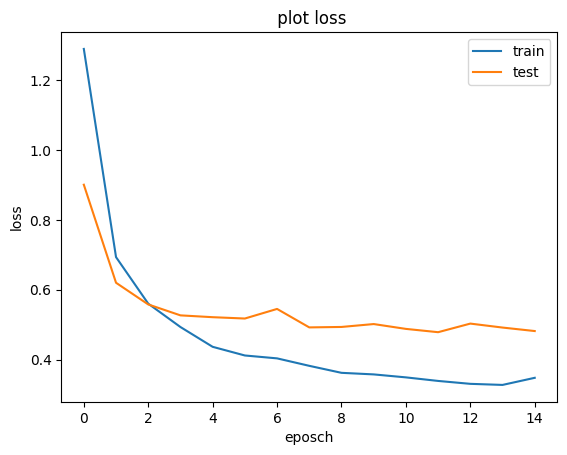

In [ ]:
from turtle import pos, title
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eposch') 
plt.ylabel('loss')
plt.title(' plot loss')
plt.legend(['train', 'test'])
plt.show()

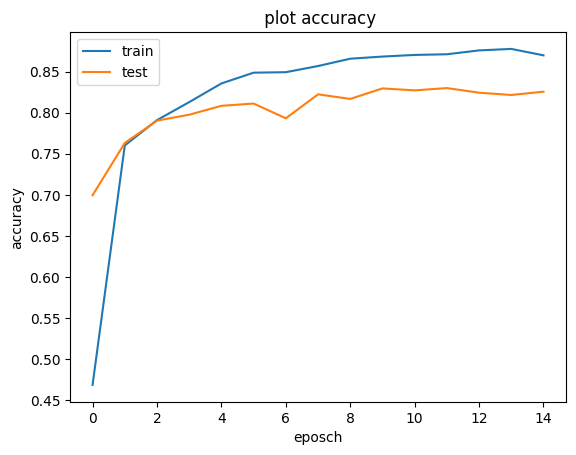

In [ ]:
from turtle import pos, title
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('eposch') 
plt.ylabel('accuracy')
plt.title(' plot accuracy')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
import tensorflow as tf
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(62, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

Adam(learning_rate=0.000015, name='Adam')
model2.compile(
        optimizer = 'Adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'],
        
)


num_epochs = 15
history = model2.fit(
    padded_latih, label_latih,
    epochs=num_epochs,
    validation_data=(padded_test, label_test), 
    batch_size=128,
    verbose=2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor="loss",
            patience=10,
            restore_best_weights=True,
        )
    ]
    )

Epoch 1/15
79/79 - 81s - loss: 1.3564 - accuracy: 0.4377 - val_loss: 1.1692 - val_accuracy: 0.5154 - 81s/epoch - 1s/step
Epoch 2/15
79/79 - 109s - loss: 0.8535 - accuracy: 0.6946 - val_loss: 0.6708 - val_accuracy: 0.7551 - 109s/epoch - 1s/step
Epoch 3/15
79/79 - 100s - loss: 0.6081 - accuracy: 0.7779 - val_loss: 0.5968 - val_accuracy: 0.7819 - 100s/epoch - 1s/step
Epoch 4/15
79/79 - 84s - loss: 0.5323 - accuracy: 0.7981 - val_loss: 0.5751 - val_accuracy: 0.7891 - 84s/epoch - 1s/step
Epoch 5/15
79/79 - 73s - loss: 0.4841 - accuracy: 0.8156 - val_loss: 0.5491 - val_accuracy: 0.7979 - 73s/epoch - 918ms/step
Epoch 6/15
79/79 - 71s - loss: 0.4423 - accuracy: 0.8388 - val_loss: 0.5108 - val_accuracy: 0.8143 - 71s/epoch - 895ms/step
Epoch 7/15
79/79 - 72s - loss: 0.4158 - accuracy: 0.8462 - val_loss: 0.5807 - val_accuracy: 0.7727 - 72s/epoch - 914ms/step
Epoch 8/15
79/79 - 84s - loss: 0.4152 - accuracy: 0.8490 - val_loss: 0.5228 - val_accuracy: 0.8155 - 84s/epoch - 1s/step
Epoch 9/15
79/79 - 

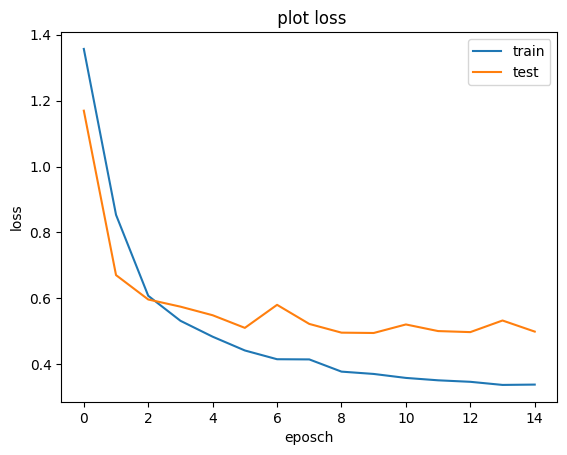

In [ ]:
from turtle import pos, title
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('eposch') 
plt.ylabel('loss')
plt.title(' plot loss')
plt.legend(['train', 'test'])
plt.show()

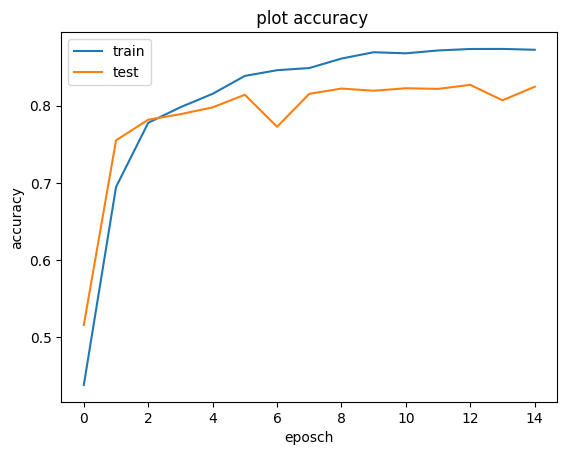

In [ ]:
from turtle import pos, title
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('eposch') 
plt.ylabel('accuracy')
plt.title(' plot accuracy')
plt.legend(['train', 'test'])
plt.show()